In [ ]:
# !pip install pystac-client requests rasterio

from pystac_client import Client
import pystac
import requests

# Create a STAC client to connect to the STAC service
catalog = Client.open("https://stac.sage.uvt.ro/")
catalog

In [ ]:
# Search for all items in the collection
search_items = catalog.search(method='GET',
                       collections=["sentinel-2-l1c"], # name of collection 
                       bbox=(20.2201924985, 43.6884447292, 29.62654341, 48.2208812526), #bounding box Romania+
                       limit=10, # limit the number of items
                       datetime="2024-06-01/2024-06-05", # date-time filter
                       # query=["eo:cloud_cover<5"],
                       # sortby=["+properties.eo:cloud_cover"],
                       ).item_collection()

In [14]:
# list all items assets
# for more details on band/channel meaning check https://gisgeography.com/sentinel-2-bands-combinations/
print(f"Found {len(search_items.items)} Items")
for s2_items in search_items.items:
    print(f"Item ID: {s2_items.id}")
    print(f"Item cloud cover: {s2_items.properties['eo:cloud_cover']}") # access properties such as cloud cover of satelite image
    bands_of_interest = ["B02", "B03", "B04"] # what to download
    for asset_key, assets in s2_items.assets.items():
        print(f"  - {asset_key}")
        # print(f"    - href: {assets.href}")
        if asset_key in bands_of_interest:
            print(f"    - href: {assets.href}")
            # try:
            #     resp = requests.get(assets.href)
            #     print(f"    - status code: {resp.status_code}")
            # except Exception as e:
            #     print(f"    - error: {e}")
            # #save cog
            # with open(f"{assets}_{asset_key}.tif", "wb") as file:
            #     file.write(resp.content)
            
            

Found 120 Items
Item ID: S2A_MSIL1C_20240605T085601_N0510_R007_T35TQL_20240605T124421
Item cloud cover: 92.298317191757
  - B01
  - B02
    - href: https://storage.info.uvt.ro/eodata/Sentinel-2/2024/6/5/T35TQL/S2A_MSIL1C_20240605T085601_N0510_R007_T35TQL_20240605T124421.SAFE/GRANULE/L1C_T35TQL_A046765_20240605T090747/IMG_DATA/T35TQL_20240605T085601_B02.tif
  - B03
    - href: https://storage.info.uvt.ro/eodata/Sentinel-2/2024/6/5/T35TQL/S2A_MSIL1C_20240605T085601_N0510_R007_T35TQL_20240605T124421.SAFE/GRANULE/L1C_T35TQL_A046765_20240605T090747/IMG_DATA/T35TQL_20240605T085601_B03.tif
  - B04
    - href: https://storage.info.uvt.ro/eodata/Sentinel-2/2024/6/5/T35TQL/S2A_MSIL1C_20240605T085601_N0510_R007_T35TQL_20240605T124421.SAFE/GRANULE/L1C_T35TQL_A046765_20240605T090747/IMG_DATA/T35TQL_20240605T085601_B04.tif
  - B05
  - B06
  - B07
  - B08
  - B09
  - B10
  - B11
  - B12
  - B8A
  - TCI
  - fmask
  - preview
  - safe-manifest
  - granule-metadata
  - inspire-metadata
  - product-metad

In [17]:
# save based on item id
s2_id = 'S2A_MSIL1C_20240601T092031_N0510_R093_T34TFP_20240601T112238'
for s2_items in search_items.items:
    if s2_items.id == s2_id:
        print(f"Item ID: {s2_items.id}")
        print(f"Item cloud cover: {s2_items.properties['eo:cloud_cover']}") # access properties such as cloud cover of satelite image
        bands_of_interest = ["B02", "B03", "B04"] # what to download
        for asset_key, assets in s2_items.assets.items():
            print(f"  - {asset_key}")
            # print(f"    - href: {assets.href}")
            if asset_key in bands_of_interest:
                print(f"    - href: {assets.href}")
                try:
                    resp = requests.get(assets.href)
                    print(f"    - status code: {resp.status_code}")
                except Exception as e:
                    print(f"    - error: {e}")
                #save cog
                with open(f"{s2_items.id}_{asset_key}.tif", "wb") as file:
                    file.write(resp.content)
    


Item ID: S2A_MSIL1C_20240601T092031_N0510_R093_T34TFP_20240601T112238
Item cloud cover: 18.461614261399
  - B01
  - B02
    - href: https://storage.info.uvt.ro/eodata/Sentinel-2/2024/6/1/T34TFP/S2A_MSIL1C_20240601T092031_N0510_R093_T34TFP_20240601T112238.SAFE/GRANULE/L1C_T34TFP_A046708_20240601T092032/IMG_DATA/T34TFP_20240601T092031_B02.tif
    - status code: 200
  - B03
    - href: https://storage.info.uvt.ro/eodata/Sentinel-2/2024/6/1/T34TFP/S2A_MSIL1C_20240601T092031_N0510_R093_T34TFP_20240601T112238.SAFE/GRANULE/L1C_T34TFP_A046708_20240601T092032/IMG_DATA/T34TFP_20240601T092031_B03.tif
    - status code: 200
  - B04
    - href: https://storage.info.uvt.ro/eodata/Sentinel-2/2024/6/1/T34TFP/S2A_MSIL1C_20240601T092031_N0510_R093_T34TFP_20240601T112238.SAFE/GRANULE/L1C_T34TFP_A046708_20240601T092032/IMG_DATA/T34TFP_20240601T092031_B04.tif
    - status code: 200
  - B05
  - B06
  - B07
  - B08
  - B09
  - B10
  - B11
  - B12
  - B8A
  - TCI
  - fmask
  - preview
  - safe-manifest
  - gr

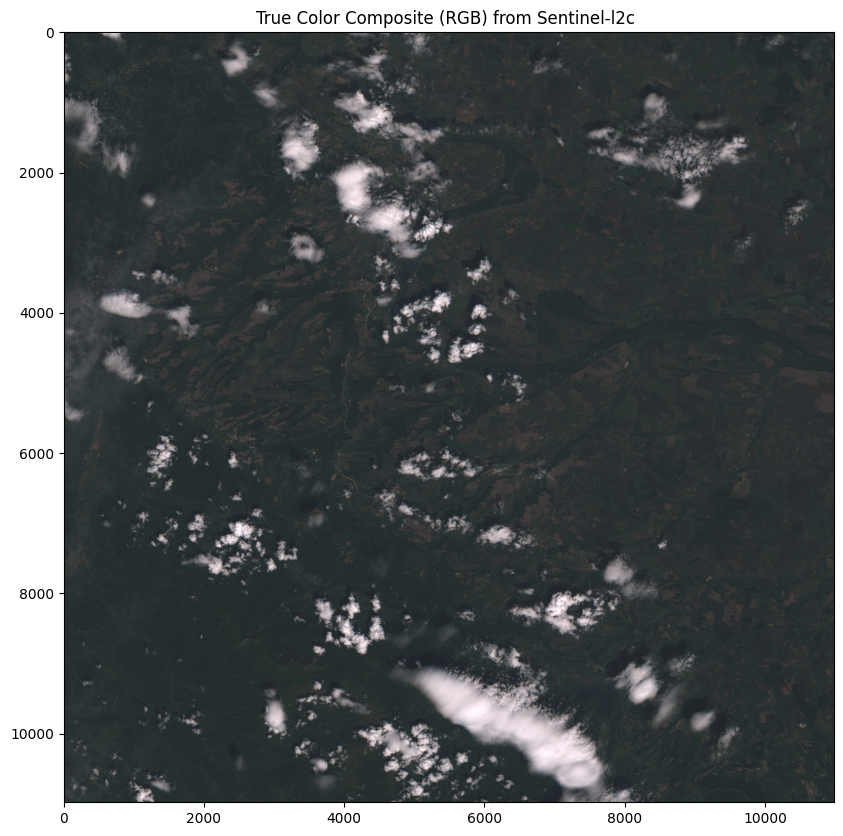

In [19]:
# open bands and plot
import numpy as np
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# open bands
red_band_path = f"{s2_id}_B04.tif"
green_band_path = f"{s2_id}_B03.tif"
blue_band_path = f"{s2_id}_B02.tif"

# Open the red, green, and blue bands using rasterio
with rasterio.open(red_band_path) as red_src:
    red = red_src.read(1)  # Read the first (and only) band
    
with rasterio.open(green_band_path) as green_src:
    green = green_src.read(1)

with rasterio.open(blue_band_path) as blue_src:
    blue = blue_src.read(1)

# sanity check
assert red.shape == green.shape == blue.shape, "The bands should have the same dimensions"
# Stack the bands to create a 3D numpy array (RGB composite)
rgb_composite = np.dstack((red, green, blue))

# Optionally normalize the pixel values to [0, 1] for visualization (if values are 0-10000)
rgb_composite_normalized = np.clip(rgb_composite / 10000, 0, 1)  # Normalize if needed

# Display the color composite using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(rgb_composite_normalized)
plt.title("True Color Composite (RGB) from Sentinel-l2c ")
# plt.axis('off')
plt.show()

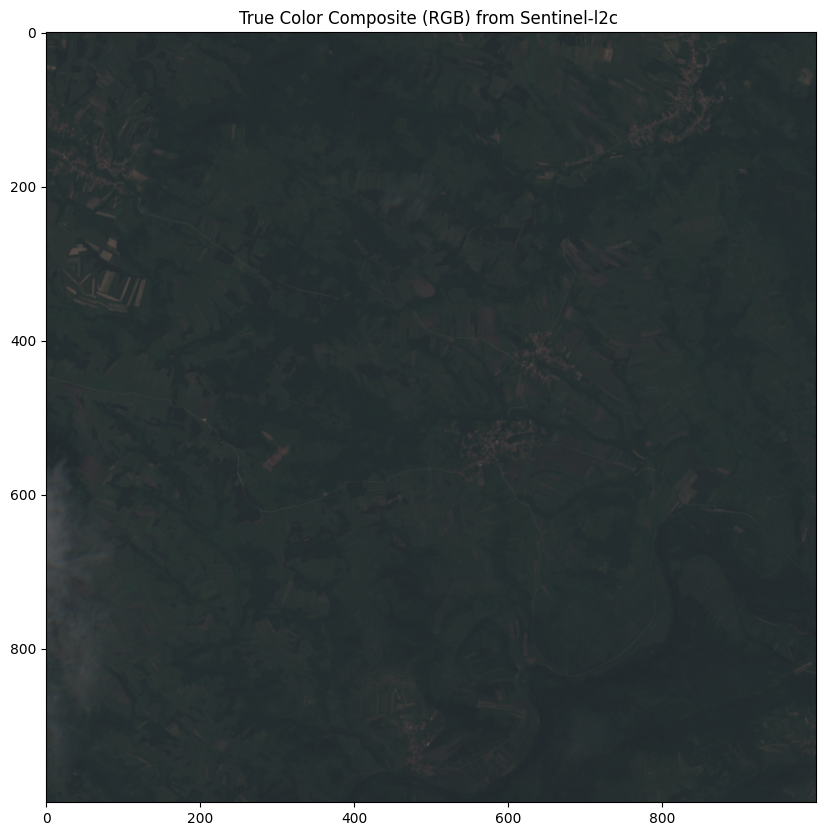

In [20]:
# zoom
plt.figure(figsize=(10, 10))
plt.imshow(rgb_composite_normalized[1000:2000, 1000:2000, :])
plt.title("True Color Composite (RGB) from Sentinel-l2c ")
# plt.axis('off')
plt.show()



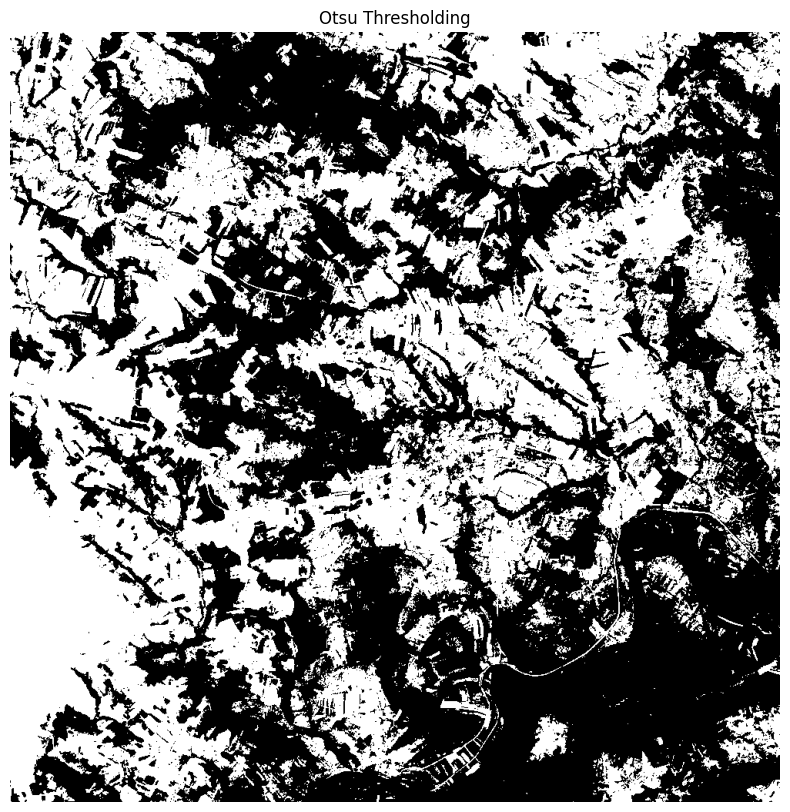

In [22]:
# apply otsu thresholding
from skimage import filters
from skimage.color import rgb2gray
from skimage import io
import matplotlib

# Convert the RGB composite to a grayscale image
gray = rgb2gray(rgb_composite_normalized[1000:2000, 1000:2000, :])

# Apply Otsu thresholding to the grayscale image
threshold = filters.threshold_otsu(gray)
binary = gray > threshold

# Display the thresholded image
plt.figure(figsize=(10, 10))
plt.imshow(binary, cmap='gray')
plt.title("Otsu Thresholding")
plt.axis('off')
plt.show()